NumPy 数组的计算有时非常快， 有时也非常慢。 使 NumPy 变快的关键是利用向量化操作， 通常在 NumPy 的通用函数（ufunc） 中实现。 NumPy 通用函数可以提高数组元素的重复计算的效率

# 1. Python默认循环缓慢的原因
    Python 的默认实现（被称作 CPython） 处理起某些操作时非常慢， 一部分原因是该语言的动态性和解释性——数据类型灵活的特性决定了序列操作不能像 C 语言和 Fortran 语言一样被编译成有效的机器码。 Python 的相对缓慢通常出现在很多小操作需要不断重复的时候， 比如对数组的每个元素做循环操作时。 
    
    假设有一个数组， 我们想计算每个元素的倒数， 一种直接的解决方法是：

In [7]:
import numpy as np
import time
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

start = time.time()
values = np.random.randint(1, 10, size=1000000)
print(values)
values = compute_reciprocals(values)
print(values)
print("time used {} s".format(time.time() - start))

[6 1 4 ... 7 5 9]
[0.16666667 1.         0.25       ... 0.14285714 0.2        0.11111111]
time used 1.8989548683166504 s


    可以看到，完成百万次上述操作并存储结果花了将近2秒的时间！。事实上，这里的处理瓶颈并不是运算本身，而是CPython在每次循环时必须做数据类型的检查和函数的调度。每次进行运算时，Python首先检查对象的类型，并且动态查找可以使用该数据类型的正确函数。
    
    如果在编译代码是进行这样的操作，那么就能在代码执行之前知晓类型的声明，结果的计算也会更加有效率。

# 2. 通用函数介绍
    NumPy 为很多类型的操作提供了非常方便的、 静态类型的、 可编译程序的接口， 也被称作向量操作。 你以通过简单地对数组执行操作来实现， 这里对数组的操作将会被用于数组中的每一个元素。 这种向量方法被用于将循环推送至 NumPy 之下的编译层， 这样会取得更快的执行效率。

In [8]:
import numpy as np
import time
np.random.seed(0)

start = time.time()
values = np.random.randint(1, 10, size=1000000)
print(values)
values = 1.0 / values
print(values)
print("time used {} s".format(time.time() - start))

[6 1 4 ... 7 5 9]
[0.16666667 1.         0.25       ... 0.14285714 0.2        0.11111111]
time used 0.02333235740661621 s


In [ ]:
    用1.0 直接除 values 是numpy向量化操作的典型，可以看到同样的结果但时间却只需要0.23秒

# 3. 探索NumPy的通用函数
    通用函数有两种存在形式： 一元通用函数（unary ufunc） 对单个输入操作， 二元通用函数（binary ufunc） 对两个输入操作。
## 3.1 数组的运算
    NumPy 通用函数的使用方式非常自然， 因为它用到了 Python 原生的算术运算符， 标准的加、 减、 乘、 除都可以使用：

In [2]:
import numpy as np
x = np.arange(4)
print("x =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) #地板除法运算

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


    NumPy实现的算术运算符
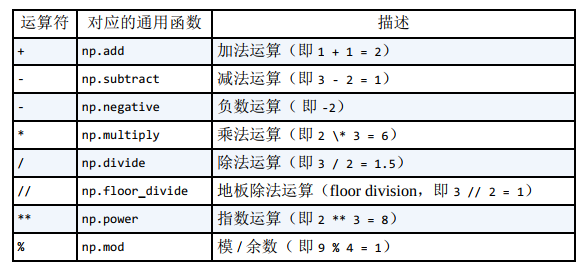

## 3.2 绝对值
    正如 NumPy 能理解 Python 内置的运算操作， NumPy 也可以理解Python 内置的绝对值函数。对应的 NumPy 通用函数是 np.absolute， 该函数也可以用别名np.abs 来访问

In [4]:
import numpy as np
x = np.array([-2, -1, 0, 1, 2])
print("abs(x): ", abs(x))
print("np.absolute(x): ", np.absolute(x))
print("np.abs(x): ", np.abs(x))

abs(x):  [2 1 0 1 2]
np.absolute(x):  [2 1 0 1 2]
np.abs(x):  [2 1 0 1 2]


## 3.3 三角函数
    NumPy 提供了大量好用的通用函数， 其中对于数据科学家最有用的就是三角函数。

In [7]:
import numpy as np
theta = np.linspace(0, np.pi, 3)
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))
# 逆三角函数
x = [-1, 0, 1]
print("x = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]
x =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


## 3.4 指数和对数

In [10]:
import numpy as np
# 指数运算
x = [1, 2, 3]
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))

# 指数运算的逆运算， 即对数运算
x = [1, 2, 4, 10]
print("x =", x)
print("ln(x) =", np.log(x))  # 最基本的 np.log 给出的是以自然数为底数的对数。
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))

# 特殊版本：当 x 的值很小时， 以下函数给出的值比 np.log 和 np.exp 的计算更精确。
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]
x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]
exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


# 4. 高级的通用函数特性
## 4.1 指定输出
    所有的通用函数都可以通过 out 参数来指定计算结果的存放位置；对于较大的数组， 通过慎重使用 out 参数将能够有效节约内存。

In [11]:
import numpy as np
x = np.arange(5)
print(x)
y = np.empty(5)
print(y)
np.multiply(x, 10, out=y)
print(y)

[0 1 2 3 4]
[-1.10714872 -0.78539816  0.          0.78539816  1.10714872]
[ 0. 10. 20. 30. 40.]


##  4.2 聚合
    二元通用函数有些非常有趣的聚合功能， 这些聚合可以直接在对象上计算。 
    例如， 如果我们希望用一个特定的运算 reduce 一个数组， 那么可以用任何通用函数的 reduce 方法。 一个 reduce 方法会对给定的元素和操作重复执行， 直至得到单个的结果。如果需要存储每次计算的中间结果， 可以使用 accumulate。

In [17]:
import numpy as np
x = np.arange(1, 6)
print("np.add.reduce(x) =", np.add.reduce(x))
print("np.multiply.reduce(x) =", np.multiply.reduce(x))
# 存储每次计算的中间结果
print("np.add.accumulate(x) =", np.add.accumulate(x))
print("np.multiply.accumulate(x) =", np.multiply.accumulate(x))

np.add.reduce(x) = 15
np.multiply.reduce(x) = 120
np.add.accumulate(x) = [ 1  3  6 10 15]
np.multiply.accumulate(x) = [  1   2   6  24 120]


## 4.3 外积
    任何通用函数都可以用 outer 方法获得两个不同输入数组所有元素对的函数运算结果。可以理解为sql中的笛卡尔积。

In [18]:
import numpy as np
x = np.arange(1,6)
print("x =", x)
print("x =", x)
print("np.multiply.outer(x, x) =", np.multiply.outer(x, x))

x = [1 2 3 4 5]
x = [1 2 3 4 5]
np.multiply.outer(x, x) = [[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
